# Climate Basics

### Vad styr klimatet på jorden?

[Video - Climate Basics](https://www.youtube.com/watch?v=aImQdYeSuGc)

Reflektionsfrågor
- Vilka tre faktorer styr klimatet på jorden i huvuddrag?
- Vad betyder det om en planet har hög Albedo?
- Vilka naturliga processer sänker koldioxidhalten i luften?
- Vad är funktionen av en termostat i hemmet?
- Vilka två processer utgör den naturliga termostaten som Jorden har?
- Vad är problemet? Varför lyckas inte den naturliga termonstaten reglera temperaturen nu för tiden?

För den nyfikne:
- Vi har radioaktivt sönderfall i Jordens inre som bidrar med värme. Hur mycket i relation? Läs här: [Earth's internal heat budget](https://en.wikipedia.org/wiki/Earth's_internal_heat_budget)


## Hur ser CO2-kurvan faktiskt ut? Kan vi titta på data från någon mätstation?

## Mauna Loa Hawaii

![](https://thumbs-prod.si-cdn.com/24KeFao_mIigx4gvZJiMHkSOUZ8=/1024x596/https://public-media.si-cdn.com/filer/89/2e/892e1813-aa70-4c6c-9e77-655ece068b1f/img_1377.jpg)
![Mauna Loa](https://i0.wp.com/fusion.net/wp-content/uploads/2016/03/Subaru_and_Keck_telescopes_at_sunset.jpg)

# Ladda hem data

Från [NOAA](https://www.esrl.noaa.gov/gmd/dv/data/index.php?site=MLO&parameter_name=Carbon%2BDioxide&frequency=Discrete)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Läsa in data

In [2]:
df = pd.read_csv('data/co2_mlo_surface-flask_1_ccgg_event.txt', header=69)

## Extrahera kolumn för datum och CO2
Datan är en textfil med massa märkliga kolumner och som är formatterad på ett lite jobbigt sätt.

Vi får använda ett **regular expression** för att plocka ut det vi är intresserade av i datat.

Man kan plocka ut en rad från datat och experimentera i [regexr.com](https://regexr.com/) för att hitta rätt.


In [3]:
s1 = df[:].squeeze()

In [4]:
s2 = s1.str.extract(r'^MLO (\d\d\d\d \d\d \d\d).*CCGG\s+([\d\.]+)')

In [8]:
type(s2)

s2.columns = ["Date", "CO2"]

s2.head()

,Date,CO2
0,1969 08 20,323.170
1,1969 08 20,324.720
2,1969 08 20,331.020
3,NaN,NaN
4,NaN,NaN


## Konvertera textsträngar till datum och tal

In [9]:
s2["Date"] = pd.to_datetime(s2["Date"])
s2["CO2"] = pd.to_numeric(s2["CO2"])

In [10]:
s2.dtypes

Date    datetime64[ns]
CO2            float64
dtype: object

## Plotta grafen och gör den tydlig

- Plotta den som vanligt först
- Ändra ylim
- Förstora fiugren
- Testa `.scatter` för datapunkter istället för liner
- Ändra storlek och färg så att outliers syns mindre

<details>
    <summary>Lösning</summary>
    
fig, ax = plt.subplots()
ax.scatter(s2["Date"], s2["CO2"], s=5, c=[[1, 0, 1, 0.2]])
ax.set_xlabel("Year")
ax.set_ylabel("CO2 (ppm)")
ax.set_ylim(300, 450)
fig.set_size_inches(24, 12)
</details>

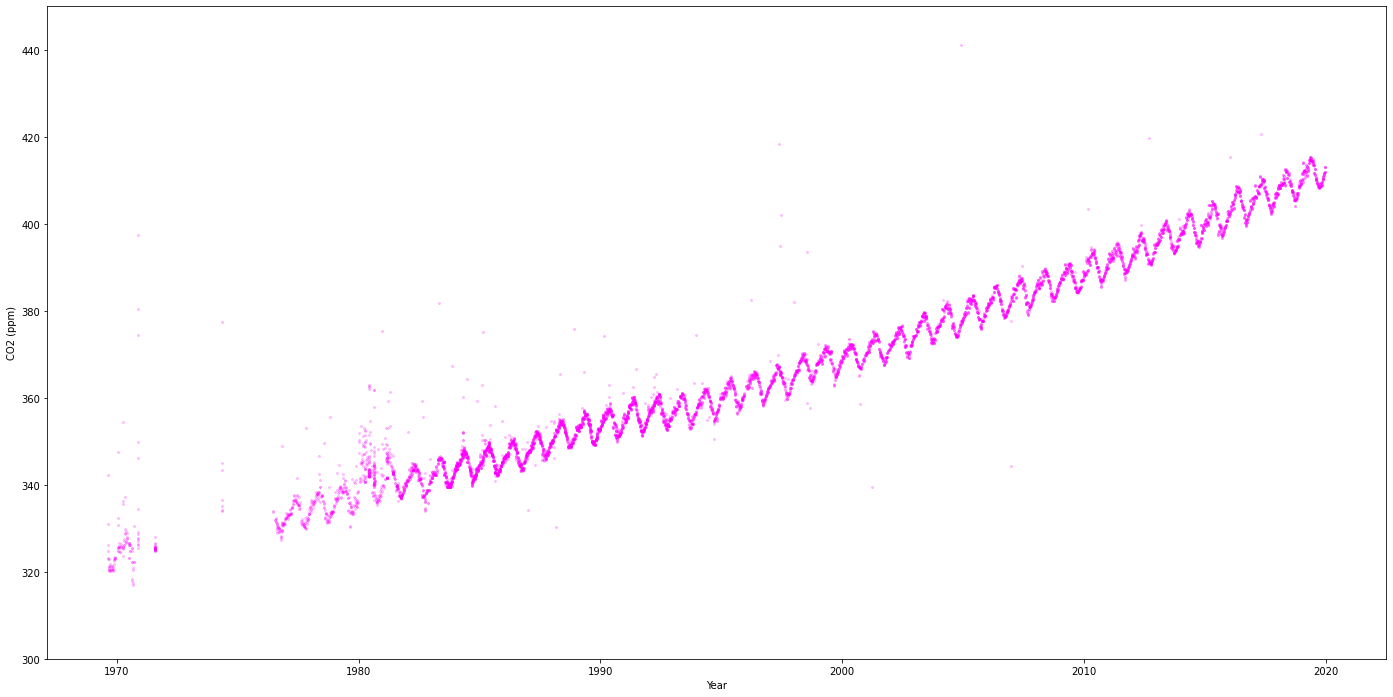

In [26]:
fig, ax = plt.subplots()
ax.scatter(s2["Date"], s2["CO2"], s=4, c=[[1, 0, 1, 0.2]])
ax.set_ylim(300, 450)
ax.set_ylabel('CO2 (ppm)')
ax.set_xlabel('Year')

fig.set_size_inches(24, 12)